##Import Libaries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from skimage.io import imread
from tensorflow.keras import layers, Sequential
from skimage.transform import resize
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras import layers, models
import os
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



##Global Variabels

In [ ]:
IMG_SIZE = 500
# DATASET_PATH = "/content/drive/MyDrive/ECG_Dataset/ECG_Updated/"
DATASET_PATH = "/content/drive/MyDrive/ECG_Dataset/Dataset/"

In [ ]:

# class ECG_Classification(Sequence):
#     def __init__(self, x_set, y_set, batch_size):
#         self.x, self.y = x_set, y_set
#         self.batch_size = batch_size
#         # print(self.x, self.y)

#     def __len__(self):
#         return math.ceil(len(self.x) / self.batch_size)

#     def __getitem__(self, idx):
#         batch_x = self.x[idx * self.batch_size:(idx + 1) *
#         self.batch_size]
#         batch_y = self.y[idx * self.batch_size:(idx + 1) *
#         self.batch_size]
#         return np.array([
#             resize(imread(file_name), (IMG_SIZE, IMG_SIZE))
#                for file_name in batch_x]), np.array(batch_y)

               

##Read Path of the Images and Respective Labels

In [ ]:

def image_names_and_class_provider(DATASET_PATH):
    main_path = os.listdir(DATASET_PATH)
    img_path = []
    classes = []
    class_ = 0
    for dataset_folder in main_path:
        dataset_path = DATASET_PATH + "/" + dataset_folder
        images = os.listdir(dataset_path)
        for image in images:
            img_path.append(DATASET_PATH + dataset_folder + "/" + image)
            classes.append(class_) 
        class_ = class_ + 1
    return np.array(img_path), np.array(classes)

    

In [ ]:

IMAGES, LABELS = image_names_and_class_provider(DATASET_PATH)
print(IMAGES[0])
print(np.unique(LABELS))
print(type(LABELS))


/content/drive/MyDrive/ECG_Dataset/Dataset/abnormal heart beats/HB (509).jpg
[0 1]
<class 'numpy.ndarray'>


##Shuffling and train-test splitting


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(IMAGES, LABELS, 
                                                    test_size=0.2, random_state=42,
                                                    shuffle=True)

In [ ]:
print('X_train: ',len(X_train))
print('X_test: ',len(X_test))
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))


X_train:  1124
X_test:  281
y_train:  1124
y_test:  281


In [ ]:
# print(y_train[:100])

#len of ones in y_train 
print("len of ones in y_train: ",len(y_train[y_train == 1]))
#len of zeros in y_train 
print("len of zeros in y_train: ",len(y_train[y_train == 0]))


len of ones in y_train:  682
len of zeros in y_train:  442


##Custom Dataset Generator

In [ ]:
class ECG_Classification(Sequence):
    def __init__(self, x_set, y_set, batch_size):
      self.x, self.y = x_set, y_set
      self.batch_size = batch_size
      # print(self.x, self.y)

    def __len__(self):      
      return math.ceil(len(self.x) / self.batch_size)

    
    def __get_input(self, path):
      image = tf.keras.preprocessing.image.load_img(path)
      image_arr = tf.keras.preprocessing.image.img_to_array(image)
      image_arr = tf.image.resize(image_arr,(IMG_SIZE, IMG_SIZE)).numpy()
      return image_arr/255.

    def __getitem__(self, idx):
      # print("index: ", idx)
      batch_x = self.x[idx * self.batch_size:(idx + 1) *
      self.batch_size]
      batch_y = self.y[idx * self.batch_size:(idx + 1) *
      self.batch_size]
      
      return np.array(
          [self.__get_input(file_name) for file_name in batch_x]), np.array(batch_y)


In [ ]:
data_loader = ECG_Classification(X_train, y_train, batch_size=32)               
data_loader.__len__()

36

In [ ]:
input_batch, labels =  data_loader[34]
print("Input Batch Shape: ", input_batch.shape)
print("labels Batch shape: ", labels.shape)


Input Batch Shape:  (32, 500, 500, 3)
labels Batch shape:  (32,)


uniques in input image:  372722
uniques in input image:  349941
uniques in input image:  372672
uniques in input image:  373450
uniques in input image:  345533
uniques in input image:  371703
uniques in input image:  345695
uniques in input image:  372164
uniques in input image:  266510
uniques in input image:  406058


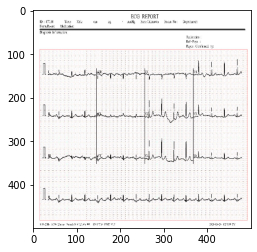

In [ ]:
plt.imshow(input_batch[2])
for i in range(10):
  print("uniques in input image: ", len(np.unique(input_batch[i])))

In [ ]:

# images, labels = data_loader[43]
# print(images.shape)
# print("images uniques: ", np.unique(images[0]))
# print("length of images uniques: ", len(np.unique(images[0])))

# print("image shape: ", images[0].shape)
# plt.imshow(images[0])

# for image in images:
#   print(len(np.unique(image)))
# print(labels)


In [ ]:
# from keras.utils.np_utils import to_categorical  
# LABELS = to_categorical(LABELS,num_classes =2)
# print(LABELS)

In [ ]:
# data_loader.__len__()

44

##Model Architecture, compiling, and Training

In [ ]:
def MODEL():
  input_shape = (IMG_SIZE, IMG_SIZE, 3)
  model = models.Sequential(
      [

                  layers.Conv2D(32, (3,3),activation='relu', input_shape=input_shape),
                  layers.MaxPool2D((2,2)),

                  layers.Conv2D(64, (3,3), activation='relu'),
                  layers.MaxPool2D((2,2)),

                  layers.Conv2D(64, (3,3), activation='relu'),
                  layers.MaxPool2D((2,2)),

                  layers.Conv2D(64, (3,3), activation='relu'),
                  layers.MaxPool2D((2,2)),

                  layers.Conv2D(64, (3,3), activation='relu'),
                  layers.MaxPool2D((2,2)),

                  layers.Flatten(),
                  layers.Dense(64, activation='relu'),
                  layers.Dense(1, activation='sigmoid')

      ]
    )
  return model

In [ ]:
data_loader = ECG_Classification(X_train, y_train, batch_size=32)
print(data_loader.__len__())
model = MODEL()
model.summary()

36
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 498, 498, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 249, 249, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 247, 247, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 123, 123, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 121, 121, 64)      36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 60, 60, 64)   

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
             )


In [ ]:
history = model.fit(
    data_loader, 
    epochs=25,
    # use_multiprocessing = True
    # workers = 1
    )


Epoch 1/25
36/36 [==============================] - 89s 2s/step - loss: 0.2877 - accuracy: 0.8852
Epoch 2/25
36/36 [==============================] - 89s 2s/step - loss: 0.2781 - accuracy: 0.8906
Epoch 3/25
36/36 [==============================] - 89s 2s/step - loss: 0.2600 - accuracy: 0.9021
Epoch 4/25
36/36 [==============================] - 89s 2s/step - loss: 0.2405 - accuracy: 0.8950
Epoch 5/25
36/36 [==============================] - 89s 2s/step - loss: 0.2142 - accuracy: 0.9146
Epoch 6/25
36/36 [==============================] - 89s 2s/step - loss: 0.1954 - accuracy: 0.9119
Epoch 7/25
36/36 [==============================] - 89s 2s/step - loss: 0.1425 - accuracy: 0.9404
Epoch 8/25
36/36 [==============================] - 89s 2s/step - loss: 0.1139 - accuracy: 0.9520
Epoch 9/25
36/36 [==============================] - 89s 2s/step - loss: 0.1054 - accuracy: 0.9635
Epoch 10/25
36/36 [==============================] - 89s 2s/step - loss: 0.0828 - accuracy: 0.9706
Epoch 11/25
36/36 [

In [ ]:
model_history = history.history
model_history.keys()

dict_keys(['loss', 'accuracy'])

Text(0.5, 1.0, 'training accuracy')

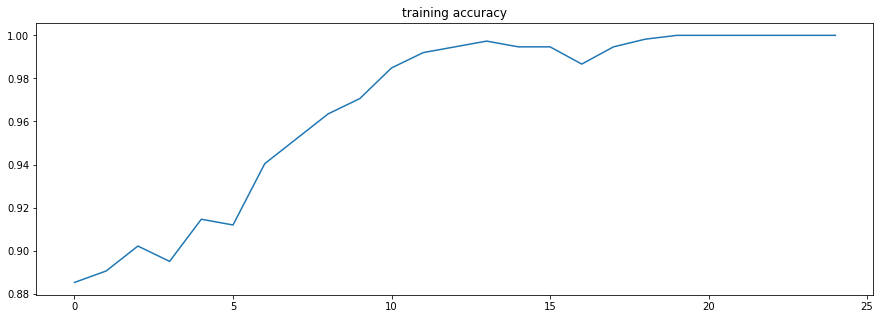

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(model_history['accuracy'])
plt.title("training accuracy")

Text(0.5, 1.0, 'training Loss')

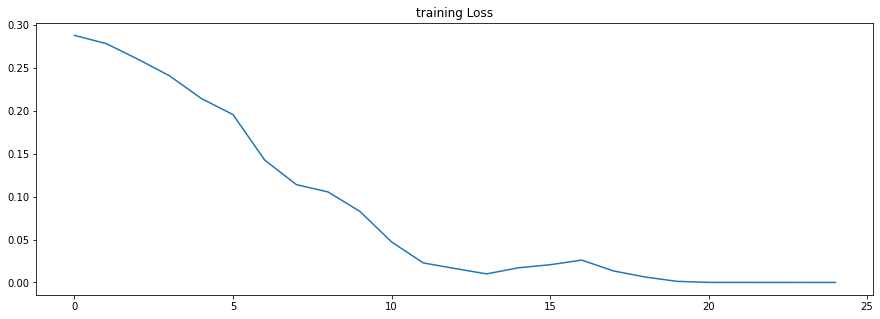

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(model_history['loss'])
plt.title("training Loss")

##Test dataloader

In [ ]:
data_loader = ECG_Classification(X_test, y_test, batch_size=32)               
data_loader.__len__()

9

In [ ]:
test_batch, actual_labels = data_loader[8]
test_batch.shape

actual_labels.shape

(25,)

In [ ]:
np.unique(test_batch[0])

array([0.0000000e+00, 2.1434298e-06, 3.7596069e-06, ..., 9.9999964e-01,
       9.9999982e-01, 1.0000000e+00], dtype=float32)

In [ ]:
def model_output_processing(y_pred):
  y_hat = []
  for res in y_pred:
    if res<0.5:
      y_hat.append(0)
    else:
      y_hat.append(1)
  return np.array(y_hat)

y_pred = model.predict(test_batch, batch_size=32)
y_pred = model_output_processing(y_pred.reshape(-1,))
print(y_pred)

[1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1]


In [ ]:
test_batch.shape

(32, 500, 500, 3)

In [ ]:
eval = model.evaluate(test_batch, 
               labels
               )
type(eval)

1/1 [==============================] - 0s 228ms/step - loss: 0.4255 - accuracy: 0.9375


list

In [ ]:
testing_accuarcy = eval[1]
testing_accuarcy

0.9375

##evaluating all the test batches

In [ ]:
def evaluate_test_batches(data_loader):
  acc = []
  for index in range(0,data_loader.__len__()):
    print("Index: ",index)
    test_batch, actual_labels = data_loader[index]
    print(test_batch.shape)
    print(actual_labels.shape)
    eval = model.evaluate(test_batch, actual_labels)
    acc.append(eval[1])
  return acc
eval_acc = evaluate_test_batches(data_loader)

Index:  0
(32, 500, 500, 3)
(32,)
1/1 [==============================] - 0s 197ms/step - loss: 0.0025 - accuracy: 1.0000
Index:  1
(32, 500, 500, 3)
(32,)
1/1 [==============================] - 0s 200ms/step - loss: 1.8310 - accuracy: 0.8750
Index:  2
(32, 500, 500, 3)
(32,)
1/1 [==============================] - 0s 195ms/step - loss: 0.6439 - accuracy: 0.8438
Index:  3
(32, 500, 500, 3)
(32,)
1/1 [==============================] - 0s 191ms/step - loss: 0.9339 - accuracy: 0.8125
Index:  4
(32, 500, 500, 3)
(32,)
1/1 [==============================] - 0s 168ms/step - loss: 1.1797 - accuracy: 0.8438
Index:  5
(32, 500, 500, 3)
(32,)
1/1 [==============================] - 0s 169ms/step - loss: 0.4174 - accuracy: 0.9375
Index:  6
(32, 500, 500, 3)
(32,)
1/1 [==============================] - 0s 166ms/step - loss: 0.4255 - accuracy: 0.9375
Index:  7
(32, 500, 500, 3)
(32,)
1/1 [==============================] - 0s 169ms/step - loss: 1.3672 - accuracy: 0.8438
Index:  8
(25, 500, 500, 3)
(25,

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 0s 269ms/step - loss: 1.8023 - accuracy: 0.8400


In [ ]:
eval_acc

[1.0,
 0.875,
 0.84375,
 0.8125,
 0.84375,
 0.9375,
 0.9375,
 0.84375,
 0.8399999737739563]

**Issues Facing while making custom Data generator**<br>

1. Accuracy and loss were not improving due to following reasons. <br>
   a. Not shuffle the path of images and labels before passing to the Data Genertor.<br>
   b. Didn't Normalize the data.<br>
